### Importing Libraries

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

### Handling Datasets

In [11]:
# Loading datasets
customers = pd.read_csv("csv files/Customers.csv")
transactions = pd.read_csv("csv files/Transactions.csv")

In [12]:
# Merging datasets for clustering
merged_data = transactions.merge(customers, on="CustomerID")
segmentation_data = merged_data.groupby("CustomerID")[["TotalValue", "Quantity"]].sum()
segmentation_data = segmentation_data.merge(customers.set_index("CustomerID"), left_index=True, right_index=True)

### Pre-Processing 

In [13]:
# Encoding categorical data
le = LabelEncoder()
segmentation_data["Region"] = le.fit_transform(segmentation_data["Region"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data.drop(columns=["CustomerName", "SignupDate"]))

### Clustering ALGO

In [14]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
segmentation_data["Cluster"] = clusters

/Users/manas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Clustering Metrics

In [15]:
# Calculation of DB Index
db_index = davies_bouldin_score(scaled_data, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.8948471162608567


In [16]:
# Save cluster results
segmentation_data.to_csv("Customer_Segments.csv", index=False)

### Visualization


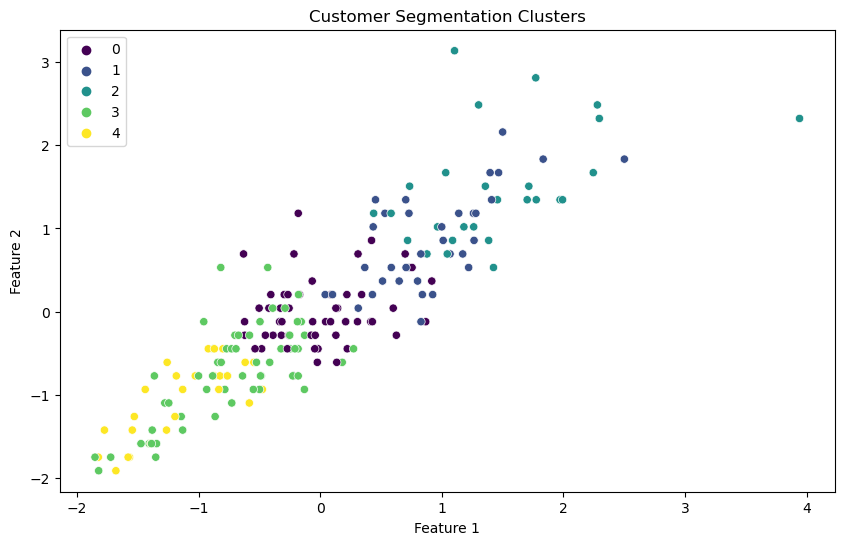

In [17]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette="viridis")
plt.title("Customer Segmentation Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Thank you.